# Merging and Cleaning Data
We have data indexed by **substituent group** for LFER data and for experimental data. Before we can analyze how these data sets relate, we will need to pick two and **merge** them.  Then we will need to **clean** them up. Preparing data is a very important part of data science. 
## Benzoic Acids and $\sigma$
The change in the $pK_a$ of bezoic acid with substitution is the **definition** of the $\sigma$ value. If we **plot** Hammett $\sigma$ values agains $pK_a$ values, we should have a **straight line** with a slope of 1.0.  Would this be a good way to **check** our LFER data agianst tabulated pKa values? If there is an **error** in one of the data sets it should **stand out**.
## Load the Data
We will load the data using the **Pandas** library `read_csv()` function ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)). Two dataframes ([documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)) will be created: one for the $pK_a$ data table and one for the LFER data. Here we will use the Williams LFER data and the Williams $pK_a$ data (two different Williams b.t.w.)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

def fill_sigma(df):     # a function to fill in sigma for empty spaces in s+ and S-
    for z in df.index:
        if np.isnan(df["s_plus"][z]):
            df["s_plus"][z] = df["sigma"][z]
        if np.isnan(df["s_minus"][z]):
            df["s_minus"][z] = df["sigma"][z]
    return(df)

df1 = pd.read_csv("../data/LFER_Williams.csv", 
                  delimiter = ",", 
                  index_col="Substituent", 
                  comment = "#", 
                  skipinitialspace = True
                 ) 
df2 = pd.read_csv("../data/LFER_williams_acidity.csv", 
                  delimiter = ",", 
                  index_col="Substituent", 
                  comment = "#", 
                  skipinitialspace = True
                 ) 
df1 = fill_sigma(df1)


## Merge The Data Sets
We will use the `join()` method that is built into Pandas dataframes. It will **align** the two data sets along the **index values** and then join them "side-to-side." There are many options. You can check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html) for more information. 

We will then plot the negative of the $pK_a$ vs. Hammett $\sigma$. We plot $-pK_a$ on the y-axis because $pK_a=-\log(K_a)$ and so we are really plotting $\log(K_a)$ when we plot $-pK_a$. Examine the plot. Do you see any potential problems?

,sigma,s_plus,s_minus,Page,BzOH_pKa,PhOH_pKa,Aniline pKa,DMA_pKa,Pyridine_pKa
Substituent,,,,,,,,,
m-Br,0.39,0.39,0.39,259.0,3.81,9.11,3.51,3.08,2.84
p-Br,0.23,0.15,0.25,259.0,4.00,9.34,3.91,3.52,NaN
m-C6H5,0.06,0.06,0.06,278.0,NaN,9.59,4.18,NaN,NaN
p-C6H5,-0.01,0.02,-0.18,278.0,NaN,9.51,4.27,NaN,NaN
m-CCCH3,0.10,0.10,0.10,265.0,NaN,NaN,NaN,NaN,NaN


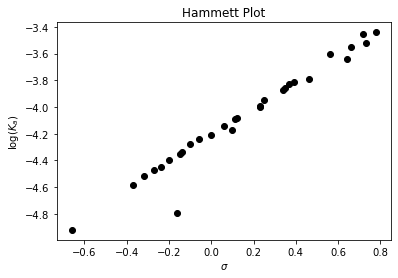

In [8]:
df3 = df1.join(df2)
display(df3.head())       # displays first 5 rows of the data frame

x = df3["sigma"]
y = -df3["BzOH_pKa"]

plt.plot(x, y, "ko")

plt.title("Hammett Plot")               
plt.xlabel(r"$\sigma$")               
plt.ylabel(r"$\log(K_a)$")         

plt.show()



## Cleaning the Data
One thing you will see in the data is "**NaN**".  This is "**Not a Number**" and is a Python concept for "**nothing**". It is **not zero**. We know what zero is but nothing is **unknowable**. So "NaN" values might cause problems for our analyses. They represent blank spaces in our data and should be **removed**. We will pare down our data to just the columns we need, and then delete all rows that contain "NaN". MatPlotLib ignored "NaN" values, but SciPy.stats will not. It will give **nonsense** answers to line fits that include "NaN" as data.

We could use the `pandas.dataframe.drop()` method to drop (delete) unneeded data series (columns). See the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) for more information. 

But we will just select a list of columns to include in the new dataframe.

We will use the `pandas.dataframe.dropna()` method to drop rows that contain "NaN". See the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html#pandas.DataFrame.dropna).

In [11]:
data = df3[["sigma", "BzOH_pKa"]]
display(data.head())

data = data.dropna()
display(data.head())

,sigma,BzOH_pKa
Substituent,,
m-Br,0.39,3.81
p-Br,0.23,4.00
m-C6H5,0.06,NaN
p-C6H5,-0.01,NaN
m-CCCH3,0.10,NaN


,sigma,BzOH_pKa
Substituent,,
m-Br,0.39,3.81
p-Br,0.23,4.00
m-CF3,0.46,3.79
m-CH3,-0.06,4.24
p-CH3,-0.14,4.34


# Analyze the Data
We now have a data set that contains a merged set of Hammett $\sigma$ values and reported $pK_a$ values for corresponding benzoic acids. We obtained this be **joining** two data sets toghether and **deleting** unneeded columns and any rows that were missing data ("NaN").

Now we can **plot** the data and perform a linear regression to get the slope ($\rho$ value). The **slope** should be near 1.0 and all the points should follow the **line** closely. How does it look?

The slope is 1.03 +/- 0.08
The intercept is -4.23 +/- 0.03


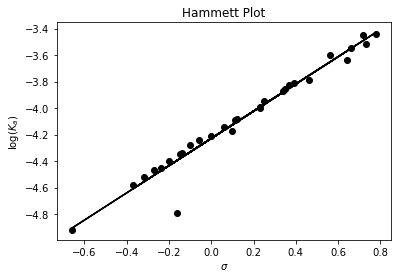

In [12]:
x = data["sigma"]
y = -data["BzOH_pKa"]

line = stats.linregress(x,y)
print("The slope is {:.2f} +/- {:.2f}".format(line.slope, 2*line.stderr))
print("The intercept is {:.2f} +/- {:.2f}".format(line.intercept, 2*line.intercept_stderr))

plt.plot(x, y, "ko")

y_list = line.slope*x+line.intercept
plt.plot(x, y_list, "k-")

plt.title("Hammett Plot")                
plt.xlabel(r"$\sigma$")                
plt.ylabel(r"$\log(K_a)$")          

plt.show()

## Conclusions
The slope was very close to 1.0 and the imtercept was very close to the $-pK_a$ for plain benzoic acid, as expected. there was one point that was "off". If we remove it the line fit will be even closer to our expectations.  Why is this point so far off the line? Go find out by examining the original source and then the data that was referenced by that source. The truth is out there.

## More Explorations
I looked at that **outlier** and saw that it is due to the $m\text{-NH}_2$ substituent. This needs **investigation**. Find out where the error is. Go!

In the meantime, I will delete the data for the $\text{-NH}_2$ substituent.  To be fair, I will **delete** the rows for both the $m\text{-NH}_2$ and the $p\text{-NH}_2$ cases.  Then we will **plot** the data set again and see what we get. Is the fit closer to 1.0? We still need to find out what is going on with the outlier. is it a **typo** or is it a **literature error**? Now is the time to **assign blame**.

The slope is 0.98 +/- 0.03
The intercept is -4.21 +/- 0.01


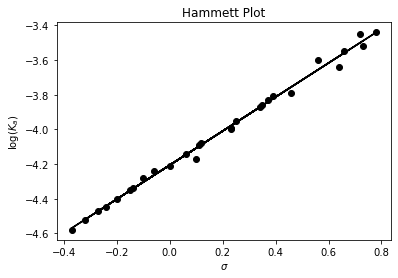

In [13]:
data = data.drop(["m-NH2", "p-NH2"], axis = 0, errors='ignore')

x = data["sigma"]
y = -data["BzOH_pKa"]

line = stats.linregress(x,y)
print("The slope is {:.2f} +/- {:.2f}".format(line.slope, 2*line.stderr))
print("The intercept is {:.2f} +/- {:.2f}".format(line.intercept, 2*line.intercept_stderr))

plt.plot(x, y, "ko")

y_list = line.slope*x+line.intercept
plt.plot(x, y_list, "k-")

plt.title("Hammett Plot")             
plt.xlabel(r"$\sigma$")             
plt.ylabel(r"$\log(K_a)$")        

plt.show()